In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): w


Параметры пучков и спектры

In [2]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [3]:
m = 20
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

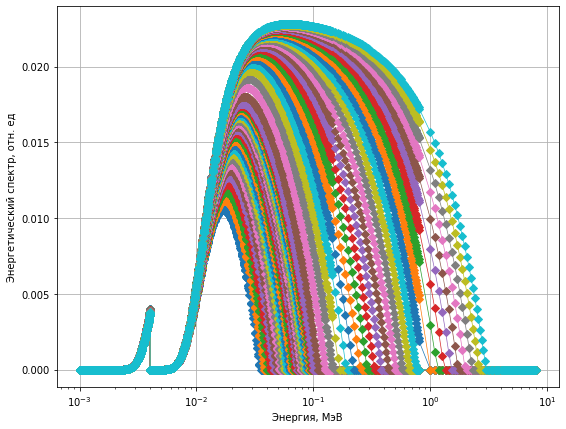

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [5]:
n = 11

In [6]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [7]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [8]:
linspace3 = np.linspace(0.001, 0.9, 101)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
edge_max_values = []
edge_max_values.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [9]:
edge_thiknesses = [[Material(i).lt(j) for i in range(n, 101)] for j in edge_max_values]

In [10]:
edge_regions = [[R(Material(i+n), edge_thiknesses[j][i]) for i in range(0, len(edge_thiknesses[j]))] for j in range(len(edge_thiknesses))]
resp_edges = [[val.f() for val in edge_regions[j]] for j in range(len(edge_regions))]

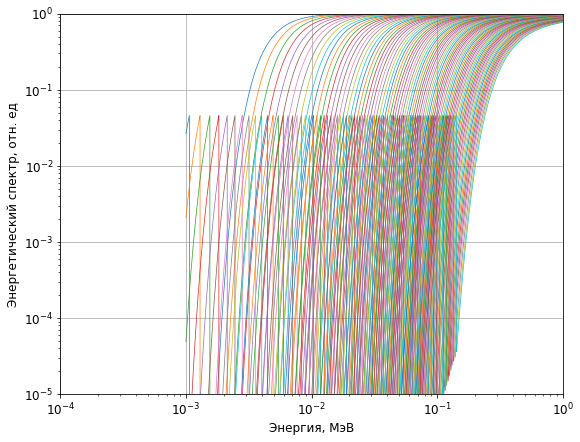

In [11]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_edges[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [12]:
from garipov_deconvolution import get_coeff_simpson

In [13]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_edges)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_edges[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.0 секунд
(1), время: 3.25837 секунд
(2), время: 6.41787 секунд
(3), время: 9.67549 секунд
(4), время: 12.89282 секунд
(5), время: 16.24983 секунд
(6), время: 19.34906 секунд
(7), время: 22.47945 секунд
(8), время: 25.63055 секунд
(9), время: 28.6971 секунд
(10), время: 31.91208 секунд
(11), время: 35.08653 секунд
(12), время: 38.26185 секунд
(13), время: 41.34115 секунд
(14), время: 44.41178 секунд
(15), время: 47.48673 секунд
(16), время: 50.56682 секунд
(17), время: 53.89567 секунд
(18), время: 56.92379 секунд
(19), время: 60.07076 секунд
(20), время: 63.04993 секунд
(21), время: 66.13302 секунд
(22), время: 69.21071 секунд
(23), время: 72.29242 секунд
(24), время: 75.37735 секунд
(25), время: 78.38465 секунд
(26), время: 81.3612 секунд
(27), время: 84.43581 секунд
(28), время: 87.57059 секунд
(29), время: 90.51425 секунд
(30), время: 93.68191 секунд
(31), время: 96.82122 секунд
(32), время: 99.99022 секунд
(33), время: 103.29694 секунд
(34), время: 106.73141 секунд
(35

Сигналы измерительных каналов

In [14]:
new_en = get_coeff_simpson(resp_edges[0][0], en, EDGE)[1]

In [15]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [16]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.01562 секунд
(2), время: 0.06412 секунд
(3), время: 0.08776 секунд
(4), время: 0.119 секунд
(5), время: 0.17149 секунд
(6), время: 0.20241 секунд
(7), время: 0.23632 секунд
(8), время: 0.27222 секунд
(9), время: 0.30514 секунд
(10), время: 0.33506 секунд
(11), время: 0.36597 секунд
(12), время: 0.39789 секунд
(13), время: 0.4288 секунд
(14), время: 0.46371 секунд
(15), время: 0.49762 секунд
(16), время: 0.53153 секунд
(17), время: 0.57541 секунд
(18), время: 0.60038 секунд
(19), время: 0.63162 секунд
(20), время: 0.66287 секунд
(21), время: 0.70973 секунд
(22), время: 0.74099 секунд
(23), время: 0.77222 секунд
(24), время: 0.80346 секунд
(25), время: 0.8347 секунд
(26), время: 0.86595 секунд
(27), время: 0.89719 секунд
(28), время: 0.92843 секунд
(29), время: 0.9753 секунд
(30), время: 1.02216 секунд
(31), время: 1.0534 секунд
(32), время: 1.08464 секунд
(33), время: 1.11589 секунд
(34), время: 1.16275 секунд
(35), время: 1.19399 секунд
(36), время:

(97), время: 3.30574 секунд
(98), время: 3.33699 секунд
(99), время: 3.36823 секунд
(100), время: 3.39947 секунд
(0), время: 0.0 секунд
(1), время: 0.01562 секунд
(2), время: 0.04686 секунд
(3), время: 0.07811 секунд
(4), время: 0.10935 секунд
(5), время: 0.14059 секунд
(6), время: 0.17183 секунд
(7), время: 0.20308 секунд
(8), время: 0.23432 секунд
(9), время: 0.26556 секунд
(10), время: 0.31243 секунд
(11), время: 0.34367 секунд
(12), время: 0.37491 секунд
(13), время: 0.40615 секунд
(14), время: 0.4374 секунд
(15), время: 0.46864 секунд
(16), время: 0.49988 секунд
(17), время: 0.53113 секунд
(18), время: 0.56237 секунд
(19), время: 0.59361 секунд
(20), время: 0.62485 секунд
(21), время: 0.6561 секунд
(22), время: 0.68735 секунд
(23), время: 0.71858 секунд
(24), время: 0.76545 секунд
(25), время: 0.79669 секунд
(26), время: 0.82793 секунд
(27), время: 0.85917 секунд
(28), время: 0.90604 секунд
(29), время: 0.93728 секунд
(30), время: 0.96852 секунд
(31), время: 0.99977 секунд
(32), в

(93), время: 3.2118 секунд
(94), время: 3.24304 секунд
(95), время: 3.27428 секунд
(96), время: 3.30553 секунд
(97), время: 3.33677 секунд
(98), время: 3.36801 секунд
(99), время: 3.39926 секунд
(100), время: 3.4305 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.15621 секунд
(5), время: 0.18745 секунд
(6), время: 0.2187 секунд
(7), время: 0.26556 секунд
(8), время: 0.2968 секунд
(9), время: 0.34007 секунд
(10), время: 0.36999 секунд
(11), время: 0.39762 секунд
(12), время: 0.42886 секунд
(13), время: 0.4601 секунд
(14), время: 0.49135 секунд
(15), время: 0.52259 секунд
(16), время: 0.55383 секунд
(17), время: 0.58507 секунд
(18), время: 0.61632 секунд
(19), время: 0.64756 секунд
(20), время: 0.6788 секунд
(21), время: 0.71004 секунд
(22), время: 0.72566 секунд
(23), время: 0.75691 секунд
(24), время: 0.78815 секунд
(25), время: 0.81939 секунд
(26), время: 0.85064 секунд
(27), время: 0.88188 секунд
(28), время

(90), время: 3.09731 секунд
(91), время: 3.12855 секунд
(92), время: 3.15979 секунд
(93), время: 3.19104 секунд
(94), время: 3.2379 секунд
(95), время: 3.26915 секунд
(96), время: 3.30039 секунд
(97), время: 3.34725 секунд
(98), время: 3.37849 секунд
(99), время: 3.41443 секунд
(100), время: 3.47467 секунд
(0), время: 0.0 секунд
(1), время: 0.0167 секунд
(2), время: 0.04794 секунд
(3), время: 0.07918 секунд
(4), время: 0.11042 секунд
(5), время: 0.15729 секунд
(6), время: 0.20415 секунд
(7), время: 0.23539 секунд
(8), время: 0.26663 секунд
(9), время: 0.29788 секунд
(10), время: 0.32912 секунд
(11), время: 0.34476 секунд
(12), время: 0.37599 секунд
(13), время: 0.40723 секунд
(14), время: 0.45409 секунд
(15), время: 0.48533 секунд
(16), время: 0.50096 секунд
(17), время: 0.5322 секунд
(18), время: 0.56344 секунд
(19), время: 0.59468 секунд
(20), время: 0.62593 секунд
(21), время: 0.65717 секунд
(22), время: 0.68841 секунд
(23), время: 0.71965 секунд
(24), время: 0.7509 секунд
(25), вре

(87), время: 2.90008 секунд
(88), время: 2.93132 секунд
(89), время: 2.96256 секунд
(90), время: 2.99381 секунд
(91), время: 3.02505 секунд
(92), время: 3.05629 секунд
(93), время: 3.08754 секунд
(94), время: 3.11878 секунд
(95), время: 3.15002 секунд
(96), время: 3.18126 секунд
(97), время: 3.21251 секунд
(98), время: 3.25937 секунд
(99), время: 3.29061 секунд
(100), время: 3.32185 секунд
(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.06248 секунд
(3), время: 0.09373 секунд
(4), время: 0.12497 секунд
(5), время: 0.15622 секунд
(6), время: 0.18746 секунд
(7), время: 0.23432 секунд
(8), время: 0.26556 секунд
(9), время: 0.29681 секунд
(10), время: 0.32805 секунд
(11), время: 0.35929 секунд
(12), время: 0.39053 секунд
(13), время: 0.42178 секунд
(14), время: 0.45302 секунд
(15), время: 0.48426 секунд
(16), время: 0.5155 секунд
(17), время: 0.53112 секунд
(18), время: 0.56237 секунд
(19), время: 0.60923 секунд
(20), время: 0.64047 секунд
(21), время: 0.68734 секунд
(22), 

(84), время: 3.15832 секунд
(85), время: 3.20518 секунд
(86), время: 3.23643 секунд
(87), время: 3.29891 секунд
(88), время: 3.34577 секунд
(89), время: 3.37702 секунд
(90), время: 3.42388 секунд
(91), время: 3.45512 секунд
(92), время: 3.50199 секунд
(93), время: 3.56447 секунд
(94), время: 3.59572 секунд
(95), время: 3.64258 секунд
(96), время: 3.67382 секунд
(97), время: 3.70508 секунд
(98), время: 3.73631 секунд
(99), время: 3.76755 секунд
(100), время: 3.79879 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.07811 секунд
(3), время: 0.10935 секунд
(4), время: 0.14059 секунд
(5), время: 0.17183 секунд
(6), время: 0.20308 секунд
(7), время: 0.26556 секунд
(8), время: 0.2968 секунд
(9), время: 0.32805 секунд
(10), время: 0.35929 секунд
(11), время: 0.39053 секунд
(12), время: 0.42177 секунд
(13), время: 0.45302 секунд
(14), время: 0.48426 секунд
(15), время: 0.53112 секунд
(16), время: 0.56237 секунд
(17), время: 0.59361 секунд
(18), время: 0.62485 секунд
(19), 

(76), время: 2.67025 секунд
(77), время: 2.69917 секунд
(78), время: 2.74604 секунд
(79), время: 2.77728 секунд
(80), время: 2.80852 секунд
(81), время: 2.85539 секунд
(82), время: 2.88663 секунд
(83), время: 2.91787 секунд
(84), время: 2.94912 секунд
(85), время: 2.98036 секунд
(86), время: 3.0116 секунд
(87), время: 3.04284 секунд
(88), время: 3.07409 секунд
(89), время: 3.10533 секунд
(90), время: 3.15219 секунд
(91), время: 3.18344 секунд
(92), время: 3.21468 секунд
(93), время: 3.24592 секунд
(94), время: 3.27716 секунд
(95), время: 3.30841 секунд
(96), время: 3.35527 секунд
(97), время: 3.38651 секунд
(98), время: 3.41776 секунд
(99), время: 3.449 секунд
(100), время: 3.49586 секунд
(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.06249 секунд
(3), время: 0.09373 секунд
(4), время: 0.12497 секунд
(5), время: 0.17183 секунд
(6), время: 0.2187 секунд
(7), время: 0.26556 секунд
(8), время: 0.29681 секунд
(9), время: 0.32805 секунд
(10), время: 0.37716 секунд
(11), вре

(72), время: 2.5524 секунд
(73), время: 2.58364 секунд
(74), время: 2.61488 секунд
(75), время: 2.65613 секунд
(76), время: 2.68509 секунд
(77), время: 2.71633 секунд
(78), время: 2.74758 секунд
(79), время: 2.77882 секунд
(80), время: 2.81006 секунд
(81), время: 2.8413 секунд
(82), время: 2.87255 секунд
(83), время: 2.91523 секунд
(84), время: 2.94187 секунд
(85), время: 2.98873 секунд
(86), время: 3.01998 секунд
(87), время: 3.06684 секунд
(88), время: 3.09808 секунд
(89), время: 3.12933 секунд
(90), время: 3.17619 секунд
(91), время: 3.20743 секунд
(92), время: 3.2543 секунд
(93), время: 3.30116 секунд
(94), время: 3.3324 секунд
(95), время: 3.36365 секунд
(96), время: 3.39489 секунд
(97), время: 3.44175 секунд
(98), время: 3.48861 секунд
(99), время: 3.51986 секунд
(100), время: 3.5511 секунд
(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.06249 секунд
(3), время: 0.10935 секунд
(4), время: 0.15621 секунд
(5), время: 0.18746 секунд
(6), время: 0.23434 секунд
(7), вр

(69), время: 2.42089 секунд
(70), время: 2.44154 секунд
(71), время: 2.47278 секунд
(72), время: 2.50402 секунд
(73), время: 2.53526 секунд
(74), время: 2.5665 секунд
(75), время: 2.59775 секунд
(76), время: 2.64085 секунд
(77), время: 2.65983 секунд
(78), время: 2.69108 секунд
(79), время: 2.72232 секунд
(80), время: 2.75356 секунд
(81), время: 2.7848 секунд
(82), время: 2.81605 секунд
(83), время: 2.85263 секунд
(84), время: 2.89257 секунд
(85), время: 2.92382 секунд
(86), время: 2.97068 секунд
(87), время: 3.01755 секунд
(88), время: 3.04879 секунд
(89), время: 3.08736 секунд
(90), время: 3.11927 секунд
(91), время: 3.14325 секунд
(92), время: 3.1745 секунд
(93), время: 3.20574 секунд
(94), время: 3.23698 секунд
(95), время: 3.28384 секунд
(96), время: 3.31903 секунд
(97), время: 3.35094 секунд
(98), время: 3.37592 секунд
(99), время: 3.40716 секунд
(100), время: 3.45403 секунд
(0), время: 0.0 секунд
(1), время: 0.05075 секунд
(2), время: 0.08167 секунд
(3), время: 0.1073 секунд
(4)

(65), время: 2.15633 секунд
(66), время: 2.18757 секунд
(67), время: 2.21881 секунд
(68), время: 2.25005 секунд
(69), время: 2.28875 секунд
(70), время: 2.32066 секунд
(71), время: 2.34164 секунд
(72), время: 2.37289 секунд
(73), время: 2.40413 секунд
(74), время: 2.43537 секунд
(75), время: 2.46661 секунд
(76), время: 2.49786 секунд
(77), время: 2.54541 секунд
(78), время: 2.57437 секунд
(79), время: 2.60562 секунд
(80), время: 2.63686 секунд
(81), время: 2.6681 секунд
(82), время: 2.69934 секунд
(83), время: 2.73058 секунд
(84), время: 2.77029 секунд
(85), время: 2.80121 секунд
(86), время: 2.82384 секунд
(87), время: 2.87071 секунд
(88), время: 2.90195 секунд
(89), время: 2.95335 секунд
(90), время: 2.98526 секунд
(91), время: 3.00823 секунд
(92), время: 3.03948 секунд
(93), время: 3.08634 секунд
(94), время: 3.11758 секунд
(95), время: 3.16445 секунд
(96), время: 3.21846 секунд
(97), время: 3.25705 секунд
(98), время: 3.2883 секунд
(99), время: 3.30392 секунд
(100), время: 3.33516 

(58), время: 1.94839 секунд
(59), время: 1.97103 секунд
(60), время: 2.00227 секунд
(61), время: 2.03351 секунд
(62), время: 2.06476 секунд
(63), время: 2.11501 секунд
(64), время: 2.15092 секунд
(65), время: 2.17156 секунд
(66), время: 2.2028 секунд
(67), время: 2.23405 секунд
(68), время: 2.26529 секунд
(69), время: 2.29653 секунд
(70), время: 2.33197 секунд
(71), время: 2.36388 секунд
(72), время: 2.38851 секунд
(73), время: 2.41975 секунд
(74), время: 2.46662 секунд
(75), время: 2.49786 секунд
(76), время: 2.5291 секунд
(77), время: 2.5667 секунд
(78), время: 2.6026 секунд
(79), время: 2.62259 секунд
(80), время: 2.66946 секунд
(81), время: 2.7007 секунд
(82), время: 2.73194 секунд
(83), время: 2.74756 секунд
(84), время: 2.79286 секунд
(85), время: 2.83375 секунд
(86), время: 2.8544 секунд
(87), время: 2.88564 секунд
(88), время: 2.91688 секунд
(89), время: 2.94813 секунд
(90), время: 2.97937 секунд
(91), время: 3.01061 секунд
(92), время: 3.04079 секунд
(93), время: 3.07275 секун

(56), время: 1.86556 секунд
(57), время: 1.89219 секунд
(58), время: 1.92343 секунд
(59), время: 1.95467 секунд
(60), время: 1.98592 секунд
(61), время: 2.01716 секунд
(62), время: 2.05183 секунд
(63), время: 2.08475 секунд
(64), время: 2.10939 секунд
(65), время: 2.14063 секунд
(66), время: 2.17187 секунд
(67), время: 2.20311 секунд
(68), время: 2.21873 секунд
(69), время: 2.27111 секунд
(70), время: 2.30302 секунд
(71), время: 2.32567 секунд
(72), время: 2.35691 секунд
(73), время: 2.38816 секунд
(74), время: 2.4194 секунд
(75), время: 2.45064 секунд
(76), время: 2.49434 секунд
(77), время: 2.52825 секунд
(78), время: 2.55887 секунд
(79), время: 2.59011 секунд
(80), время: 2.62136 секунд
(81), время: 2.6526 секунд
(82), время: 2.66822 секунд
(83), время: 2.71325 секунд
(84), время: 2.74517 секунд
(85), время: 2.77579 секунд
(86), время: 2.80703 секунд
(87), время: 2.83827 секунд
(88), время: 2.86952 секунд
(89), время: 2.90076 секунд
(90), время: 2.95311 секунд
(91), время: 2.99001 с

(51), время: 1.7282 секунд
(52), время: 1.76386 секунд
(53), время: 1.78983 секунд
(54), время: 1.82107 секунд
(55), время: 1.86794 секунд
(56), время: 1.89918 секунд
(57), время: 1.94604 секунд
(58), время: 1.97949 секунд
(59), время: 2.0104 секунд
(60), время: 2.03804 секунд
(61), время: 2.06928 секунд
(62), время: 2.10053 секунд
(63), время: 2.13177 секунд
(64), время: 2.16301 секунд
(65), время: 2.21902 секунд
(66), время: 2.239 секунд
(67), время: 2.28587 секунд
(68), время: 2.31711 секунд
(69), время: 2.34835 секунд
(70), время: 2.3796 секунд
(71), время: 2.41084 секунд
(72), время: 2.45137 секунд
(73), время: 2.48429 секунд
(74), время: 2.50493 секунд
(75), время: 2.53617 секунд
(76), время: 2.56741 секунд
(77), время: 2.61428 секунд
(78), время: 2.66115 секунд
(79), время: 2.7017 секунд
(80), время: 2.7383 секунд
(81), время: 2.76954 секунд
(82), время: 2.81641 секунд
(83), время: 2.84765 секунд
(84), время: 2.87889 секунд
(85), время: 2.93336 секунд
(86), время: 2.97196 секунд

(46), время: 1.56961 секунд
(47), время: 1.60085 секунд
(48), время: 1.63209 секунд
(49), время: 1.66334 секунд
(50), время: 1.69458 секунд
(51), время: 1.72582 секунд
(52), время: 1.76242 секунд
(53), время: 1.79433 секунд
(54), время: 1.8193 секунд
(55), время: 1.85054 секунд
(56), время: 1.88179 секунд
(57), время: 1.91303 секунд
(58), время: 1.94427 секунд
(59), время: 1.97551 секунд
(60), время: 2.01743 секунд
(61), время: 2.04935 секунд
(62), время: 2.068 секунд
(63), время: 2.09924 секунд
(64), время: 2.13049 секунд
(65), время: 2.16173 секунд
(66), время: 2.20402 секунд
(67), время: 2.23693 секунд
(68), время: 2.26885 секунд
(69), время: 2.2855 секунд
(70), время: 2.31674 секунд
(71), время: 2.34799 секунд
(72), время: 2.37923 секунд
(73), время: 2.41047 секунд
(74), время: 2.46954 секунд
(75), время: 2.50216 секунд
(76), время: 2.5334 секунд
(77), время: 2.56465 секунд
(78), время: 2.59589 секунд
(79), время: 2.62713 секунд
(80), время: 2.66774 секунд
(81), время: 2.70164 секу

(40), время: 1.38177 секунд
(41), время: 1.41302 секунд
(42), время: 1.46596 секунд
(43), время: 1.5059 секунд
(44), время: 1.53714 секунд
(45), время: 1.58401 секунд
(46), время: 1.63087 секунд
(47), время: 1.6748 секунд
(48), время: 1.71668 секунд
(49), время: 1.75395 секунд
(50), время: 1.78519 секунд
(51), время: 1.81643 секунд
(52), время: 1.84767 секунд
(53), время: 1.90129 секунд
(54), время: 1.92226 секунд
(55), время: 1.9535 секунд
(56), время: 1.98475 секунд
(57), время: 2.03161 секунд
(58), время: 2.06285 секунд
(59), время: 2.0941 секунд
(60), время: 2.12717 секунд
(61), время: 2.15613 секунд
(62), время: 2.20299 секунд
(63), время: 2.23423 секунд
(64), время: 2.26548 секунд
(65), время: 2.32023 секунд
(66), время: 2.35314 секунд
(67), время: 2.37212 секунд
(68), время: 2.43461 секунд
(69), время: 2.46585 секунд
(70), время: 2.53522 секунд
(71), время: 2.57412 секунд
(72), время: 2.60474 секунд
(73), время: 2.66722 секунд
(74), время: 2.68284 секунд
(75), время: 2.71408 сек

(32), время: 1.1336 секунд
(33), время: 1.16484 секунд
(34), время: 1.21171 секунд
(35), время: 1.26441 секунд
(36), время: 1.30401 секунд
(37), время: 1.33525 секунд
(38), время: 1.38211 секунд
(39), время: 1.41336 секунд
(40), время: 1.4446 секунд
(41), время: 1.49669 секунд
(42), время: 1.52167 секунд
(43), время: 1.55291 секунд
(44), время: 1.58416 секунд
(45), время: 1.6154 секунд
(46), время: 1.66226 секунд
(47), время: 1.71054 секунд
(48), время: 1.7385 секунд
(49), время: 1.76974 секунд
(50), время: 1.80099 секунд
(51), время: 1.83223 секунд
(52), время: 1.86347 секунд
(53), время: 1.90797 секунд
(54), время: 1.93988 секунд
(55), время: 1.9705 секунд
(56), время: 2.00174 секунд
(57), время: 2.06423 секунд
(58), время: 2.09547 секунд
(59), время: 2.15282 секунд
(60), время: 2.18673 секунд
(61), время: 2.20472 секунд
(62), время: 2.25159 секунд
(63), время: 2.31407 секунд
(64), время: 2.34532 секунд
(65), время: 2.37831 секунд
(66), время: 2.40527 секунд
(67), время: 2.43652 секу

(25), время: 0.80931 секунд
(26), время: 0.84055 секунд
(27), время: 0.88548 секунд
(28), время: 0.91844 секунд
(29), время: 0.94968 секунд
(30), время: 0.96531 секунд
(31), время: 0.99655 секунд
(32), время: 1.02779 секунд
(33), время: 1.05904 секунд
(34), время: 1.11349 секунд
(35), время: 1.1345 секунд
(36), время: 1.16574 секунд
(37), время: 1.19699 секунд
(38), время: 1.24385 секунд
(39), время: 1.27509 секунд
(40), время: 1.32268 секунд
(41), время: 1.35164 секунд
(42), время: 1.3985 секунд
(43), время: 1.42974 секунд
(44), время: 1.46099 секунд
(45), время: 1.49223 секунд
(46), время: 1.5373 секунд
(47), время: 1.56826 секунд
(48), время: 1.5995 секунд
(49), время: 1.61513 секунд
(50), время: 1.67761 секунд
(51), время: 1.70885 секунд
(52), время: 1.7401 секунд
(53), время: 1.78255 секунд
(54), время: 1.80155 секунд
(55), время: 1.83279 секунд
(56), время: 1.87966 секунд
(57), время: 1.89528 секунд
(58), время: 1.92652 секунд
(59), время: 1.97684 секунд
(60), время: 2.00181 секу

Восстановление спектров

In [17]:
from garipov_deconvolution import Gold

In [18]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_edges))]
    dev = [0 for i in range(len(resp_edges))]
    norm = [0 for i in range(len(resp_edges))]
    
    start_time = time.time()
    
    for i in range(len(resp_edges)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

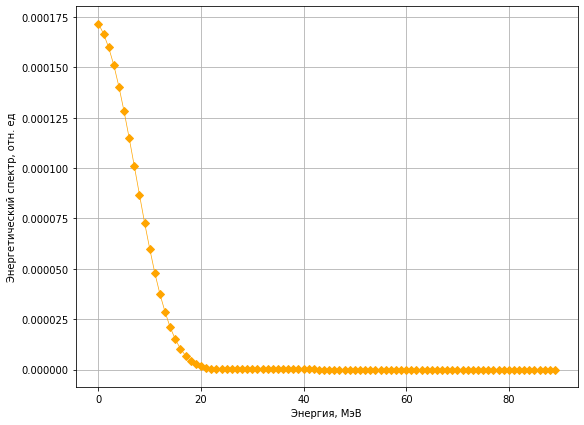

In [19]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(90), spectrums_signals[0][0], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [20]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 5.73041 секунд
(2), время: 11.40759 секунд
(3), время: 17.07143 секунд
(4), время: 22.70941 секунд
(5), время: 28.32368 секунд
(6), время: 33.94098 секунд
(7), время: 39.64225 секунд
(8), время: 45.27346 секунд
(9), время: 50.8622 секунд
(10), время: 56.47493 секунд
(11), время: 62.07648 секунд
(12), время: 67.68726 секунд
(13), время: 73.29059 секунд
(14), время: 78.9296 секунд
(15), время: 84.81291 секунд
(16), время: 90.7772 секунд
(17), время: 96.68475 секунд
(18), время: 102.63048 секунд
(19), время: 108.67807 секунд
(20), время: 114.59929 секунд
(21), время: 120.5538 секунд
(22), время: 126.56371 секунд
(23), время: 132.49478 секунд
(24), время: 138.40768 секунд
(25), время: 144.36773 секунд
(26), время: 150.32997 секунд
(27), время: 156.30817 секунд
(28), время: 162.26012 секунд
(29), время: 168.24771 секунд
(30), время: 174.28175 секунд
(31), время: 180.45758 секунд
(32), время: 186.62156 секунд
(33), время: 192.9614 секунд
(34), время: 199.09

(75), время: 442.55283 секунд
(76), время: 448.57383 секунд
(77), время: 454.46308 секунд
(78), время: 460.35232 секунд
(79), время: 466.22718 секунд
(80), время: 472.13205 секунд
(81), время: 478.01346 секунд
(82), время: 483.93195 секунд
(83), время: 489.86926 секунд
(84), время: 495.80815 секунд
(85), время: 501.75988 секунд
(86), время: 507.70476 секунд
(87), время: 513.67211 секунд
(88), время: 519.62384 секунд
(89), время: 525.58202 секунд
(90), время: 531.51812 секунд
(91), время: 537.44516 секунд
(92), время: 543.4007 секунд
(93), время: 549.33681 секунд
(94), время: 555.2419 секунд
(95), время: 561.178 секунд
(96), время: 567.1095 секунд
(97), время: 573.0456 секунд
(98), время: 578.99733 секунд
(99), время: 584.94765 секунд
(100), время: 590.89938 секунд
ВЫПОЛНЕНО 3 из 50
(0), время: 0.0 секунд
(1), время: 5.91715 секунд
(2), время: 11.79077 секунд
(3), время: 17.69003 секунд
(4), время: 23.5949 секунд
(5), время: 29.48955 секунд
(6), время: 35.40315 секунд
(7), время: 41.292

(48), время: 285.19941 секунд
(49), время: 291.18963 секунд
(50), время: 297.12958 секунд
(51), время: 303.04717 секунд
(52), время: 309.05681 секунд
(53), время: 314.99007 секунд
(54), время: 320.93514 секунд
(55), время: 326.88401 секунд
(56), время: 332.79826 секунд
(57), время: 338.69644 секунд
(58), время: 344.60042 секунд
(59), время: 350.513 секунд
(60), время: 356.41395 секунд
(61), время: 362.31818 секунд
(62), время: 368.31268 секунд
(63), время: 374.19931 секунд
(64), время: 380.1181 секунд
(65), время: 386.03341 секунд
(66), время: 391.92052 секунд
(67), время: 397.7846 секунд
(68), время: 403.64211 секунд
(69), время: 409.51452 секунд
(70), время: 415.43208 секунд
(71), время: 421.29873 секунд
(72), время: 427.21476 секунд
(73), время: 433.14974 секунд
(74), время: 439.06771 секунд
(75), время: 444.95648 секунд
(76), время: 450.84651 секунд
(77), время: 456.73389 секунд
(78), время: 462.66916 секунд
(79), время: 468.54522 секунд
(80), время: 474.43275 секунд
(81), время: 4

(21), время: 123.46439 секунд
(22), время: 129.46305 секунд
(23), время: 135.3782 секунд
(24), время: 141.30724 секунд
(25), время: 147.21918 секунд
(26), время: 153.15661 секунд
(27), время: 159.08635 секунд
(28), время: 165.01553 секунд
(29), время: 170.94589 секунд
(30), время: 176.87441 секунд
(31), время: 182.75645 секунд
(32), время: 188.63758 секунд
(33), время: 194.5183 секунд
(34), время: 200.39892 секунд
(35), время: 206.26385 секунд
(36), время: 212.12784 секунд
(37), время: 218.04218 секунд
(38), время: 223.91152 секунд
(39), время: 229.79841 секунд
(40), время: 235.75474 секунд
(41), время: 241.605 секунд
(42), время: 247.48757 секунд
(43), время: 253.45292 секунд
(44), время: 259.40216 секунд
(45), время: 265.38578 секунд
(46), время: 271.29644 секунд
(47), время: 277.22677 секунд
(48), время: 283.18832 секунд
(49), время: 289.11857 секунд
(50), время: 295.09728 секунд
(51), время: 301.01125 секунд
(52), время: 306.93978 секунд
(53), время: 312.87082 секунд
(54), время: 3

(95), время: 560.2595 секунд
(96), время: 566.18915 секунд
(97), время: 572.15296 секунд
(98), время: 578.03803 секунд
(99), время: 583.96658 секунд
(100), время: 589.85021 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 5.94858 секунд
(2), время: 11.80484 секунд
(3), время: 17.65734 секунд
(4), время: 23.57221 секунд
(5), время: 29.42702 секунд
(6), время: 35.32427 секунд
(7), время: 41.19429 секунд
(8), время: 47.1093 секунд
(9), время: 53.01367 секунд
(10), время: 58.89941 секунд
(11), время: 64.7988 секунд
(12), время: 70.71739 секунд
(13), время: 76.58319 секунд
(14), время: 82.44822 секунд
(15), время: 88.31241 секунд
(16), время: 94.20858 секунд
(17), время: 100.07428 секунд
(18), время: 105.98324 секунд
(19), время: 111.89627 секунд
(20), время: 117.91934 секунд
(21), время: 123.97994 секунд
(22), время: 130.53408 секунд
(23), время: 136.75161 секунд
(24), время: 142.82165 секунд
(25), время: 148.80086 секунд
(26), время: 154.74417 секунд
(27), время: 160.67401 сек

(68), время: 401.09427 секунд
(69), время: 406.96936 секунд
(70), время: 412.85995 секунд
(71), время: 419.01537 секунд
(72), время: 425.04378 секунд
(73), время: 430.91658 секунд
(74), время: 436.81914 секунд
(75), время: 442.73695 секунд
(76), время: 448.60851 секунд
(77), время: 454.46405 секунд
(78), время: 460.39879 секунд
(79), время: 466.23424 секунд
(80), время: 472.15966 секунд
(81), время: 478.09226 секунд
(82), время: 484.01186 секунд
(83), время: 489.94631 секунд
(84), время: 495.86409 секунд
(85), время: 501.78246 секунд
(86), время: 507.7003 секунд
(87), время: 513.64985 секунд
(88), время: 519.57121 секунд
(89), время: 525.49082 секунд
(90), время: 531.43719 секунд
(91), время: 537.38756 секунд
(92), время: 543.32211 секунд
(93), время: 549.25579 секунд
(94), время: 555.1432 секунд
(95), время: 561.04224 секунд
(96), время: 566.97787 секунд
(97), время: 572.9449 секунд
(98), время: 578.86251 секунд
(99), время: 584.79643 секунд
(100), время: 590.76614 секунд
ВЫПОЛНЕНО 14

(41), время: 241.65934 секунд
(42), время: 247.51246 секунд
(43), время: 253.39346 секунд
(44), время: 259.27665 секунд
(45), время: 265.17352 секунд
(46), время: 271.08431 секунд
(47), время: 277.02948 секунд
(48), время: 282.97751 секунд
(49), время: 288.96898 секунд
(50), время: 294.9089 секунд
(51), время: 300.85556 секунд
(52), время: 306.79979 секунд
(53), время: 312.74694 секунд
(54), время: 318.67669 секунд
(55), время: 324.62408 секунд
(56), время: 330.52548 секунд
(57), время: 336.3936 секунд
(58), время: 342.31763 секунд
(59), время: 348.28098 секунд
(60), время: 354.18203 секунд
(61), время: 360.05012 секунд
(62), время: 365.95311 секунд
(63), время: 371.85574 секунд
(64), время: 377.75967 секунд
(65), время: 383.64854 секунд
(66), время: 389.486 секунд
(67), время: 395.35399 секунд
(68), время: 401.20671 секунд
(69), время: 407.13961 секунд
(70), время: 413.07022 секунд
(71), время: 418.90975 секунд
(72), время: 424.94555 секунд
(73), время: 430.85277 секунд
(74), время: 4

(14), время: 81.95787 секунд
(15), время: 87.8071 секунд
(16), время: 93.6709 секунд
(17), время: 99.50648 секунд
(18), время: 105.35328 секунд
(19), время: 111.23238 секунд
(20), время: 117.19729 секунд
(21), время: 123.0714 секунд
(22), время: 128.94042 секунд
(23), время: 134.822 секунд
(24), время: 140.76597 секунд
(25), время: 146.66415 секунд
(26), время: 152.5453 секунд
(27), время: 158.39329 секунд
(28), время: 164.24106 секунд
(29), время: 170.08815 секунд
(30), время: 175.95972 секунд
(31), время: 181.85278 секунд
(32), время: 187.73649 секунд
(33), время: 193.57029 секунд
(34), время: 199.45013 секунд
(35), время: 205.3322 секунд
(36), время: 211.19733 секунд
(37), время: 217.08082 секунд
(38), время: 222.96557 секунд
(39), время: 228.83183 секунд
(40), время: 234.70971 секунд
(41), время: 240.67426 секунд
(42), время: 246.52957 секунд
(43), время: 252.44643 секунд
(44), время: 258.29693 секунд
(45), время: 264.20984 секунд
(46), время: 270.10767 секунд
(47), время: 276.0226

(87), время: 521.37647 секунд
(88), время: 527.47925 секунд
(89), время: 533.54914 секунд
(90), время: 539.64146 секунд
(91), время: 545.73378 секунд
(92), время: 551.8261 секунд
(93), время: 557.93456 секунд
(94), время: 564.11354 секунд
(95), время: 570.20586 секунд
(96), время: 576.3138 секунд
(97), время: 582.38274 секунд
(98), время: 588.38307 секунд
(99), время: 594.39943 секунд
(100), время: 600.3824 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 6.03545 секунд
(2), время: 11.92469 секунд
(3), время: 17.93512 секунд
(4), время: 23.87706 секунд
(5), время: 29.84864 секунд
(6), время: 35.90277 секунд
(7), время: 41.8585 секунд
(8), время: 47.80671 секунд
(9), время: 53.65806 секунд
(10), время: 59.48482 секунд
(11), время: 65.31158 секунд
(12), время: 71.18503 секунд
(13), время: 77.22928 секунд
(14), время: 83.23107 секунд
(15), время: 89.11339 секунд
(16), время: 95.25809 секунд
(17), время: 101.88028 секунд
(18), время: 109.59288 секунд
(19), время: 116.56944 секу

(60), время: 369.0139 секунд
(61), время: 374.90315 секунд
(62), время: 380.78333 секунд
(63), время: 386.68819 секунд
(64), время: 392.60058 секунд
(65), время: 398.46415 секунд
(66), время: 404.42484 секунд
(67), время: 410.30688 секунд
(68), время: 416.5019 секунд
(69), время: 422.64447 секунд
(70), время: 429.97867 секунд
(71), время: 436.38674 секунд
(72), время: 443.25891 секунд
(73), время: 449.6578 секунд
(74), время: 456.40929 секунд
(75), время: 463.08697 секунд
(76), время: 469.3437 секунд
(77), время: 475.24947 секунд
(78), время: 481.13613 секунд
(79), время: 486.99829 секунд
(80), время: 492.88468 секунд
(81), время: 498.80279 секунд
(82), время: 504.67593 секунд
(83), время: 510.56263 секунд
(84), время: 516.46653 секунд
(85), время: 522.47839 секунд
(86), время: 528.40592 секунд
(87), время: 534.33987 секунд
(88), время: 540.2441 секунд
(89), время: 546.20856 секунд
(90), время: 552.12661 секунд
(91), время: 558.06236 секунд
(92), время: 563.96439 секунд
(93), время: 56

(33), время: 198.6953 секунд
(34), время: 204.74394 секунд
(35), время: 210.80333 секунд
(36), время: 216.87633 секунд
(37), время: 222.92672 секунд
(38), время: 228.9615 секунд
(39), время: 234.99525 секунд
(40), время: 241.01331 секунд
(41), время: 246.99811 секунд
(42), время: 253.04456 секунд
(43), время: 259.00028 секунд
(44), время: 264.95601 секунд
(45), время: 270.83742 секунд
(46), время: 276.73707 секунд
(47), время: 282.66955 секунд
(48), время: 288.587 секунд
(49), время: 294.55058 секунд
(50), время: 300.45491 секунд
(51), время: 306.35415 секунд
(52), время: 312.26909 секунд
(53), время: 318.17051 секунд
(54), время: 324.06324 секунд
(55), время: 330.09761 секунд
(56), время: 336.04257 секунд
(57), время: 341.92217 секунд
(58), время: 347.8838 секунд
(59), время: 353.7245 секунд
(60), время: 359.55919 секунд
(61), время: 365.42361 секунд
(62), время: 371.25725 секунд
(63), время: 377.10671 секунд
(64), время: 383.03435 секунд
(65), время: 388.93107 секунд
(66), время: 394

(5), время: 29.94188 секунд
(6), время: 35.89309 секунд
(7), время: 41.88996 секунд
(8), время: 47.84262 секунд
(9), время: 53.79266 секунд
(10), время: 59.74253 секунд
(11), время: 65.72503 секунд
(12), время: 71.67467 секунд
(13), время: 77.67216 секунд
(14), время: 83.65612 секунд
(15), время: 89.65581 секунд
(16), время: 95.62406 секунд
(17), время: 101.5903 секунд
(18), время: 107.58962 секунд
(19), время: 113.57371 секунд
(20), время: 119.58814 секунд
(21), время: 125.58926 секунд
(22), время: 131.60503 секунд
(23), время: 137.68477 секунд
(24), время: 143.73586 секунд
(25), время: 149.77083 секунд
(26), время: 155.77123 секунд
(27), время: 161.77257 секунд
(28), время: 167.77205 секунд
(29), время: 173.7568 секунд
(30), время: 179.73989 секунд
(31), время: 185.75479 секунд
(32), время: 191.75564 секунд
(33), время: 197.78693 секунд
(34), время: 203.77274 секунд
(35), время: 209.77249 секунд
(36), время: 215.75641 секунд
(37), время: 221.75522 секунд
(38), время: 227.77145 секунд

(79), время: 472.70359 секунд
(80), время: 478.5851 секунд
(81), время: 484.4837 секунд
(82), время: 490.42446 секунд
(83), время: 496.32156 секунд
(84), время: 502.20145 секунд
(85), время: 508.08489 секунд
(86), время: 513.9992 секунд
(87), время: 519.89977 секунд
(88), время: 525.78544 секунд
(89), время: 531.65258 секунд
(90), время: 537.55024 секунд
(91), время: 543.44942 секунд
(92), время: 549.33402 секунд
(93), время: 555.20213 секунд
(94), время: 561.06905 секунд
(95), время: 566.99884 секунд
(96), время: 572.94644 секунд
(97), время: 578.88091 секунд
(98), время: 584.79792 секунд
(99), время: 590.69894 секунд
(100), время: 596.61562 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 5.93112 секунд
(2), время: 11.82047 секунд
(3), время: 17.6475 секунд
(4), время: 23.51274 секунд
(5), время: 29.34783 секунд
(6), время: 35.19697 секунд
(7), время: 41.04736 секунд
(8), время: 46.89663 секунд
(9), время: 52.73222 секунд
(10), время: 58.5811 секунд
(11), время: 64.47722 

(52), время: 309.51734 секунд
(53), время: 315.77434 секунд
(54), время: 321.97583 секунд
(55), время: 328.17665 секунд
(56), время: 334.40789 секунд
(57), время: 340.62567 секунд
(58), время: 346.7961 секунд
(59), время: 352.97868 секунд
(60), время: 359.19827 секунд
(61), время: 365.66484 секунд
(62), время: 372.07998 секунд
(63), время: 378.46595 секунд
(64), время: 384.76998 секунд
(65), время: 391.06935 секунд
(66), время: 397.24594 секунд
(67), время: 403.50627 секунд
(68), время: 409.61564 секунд
(69), время: 415.65472 секунд
(70), время: 421.67135 секунд
(71), время: 427.68963 секунд
(72), время: 433.75274 секунд
(73), время: 439.77312 секунд
(74), время: 445.80522 секунд
(75), время: 451.83689 секунд
(76), время: 457.85621 секунд
(77), время: 463.88827 секунд
(78), время: 469.9057 секунд
(79), время: 475.93865 секунд
(80), время: 482.05476 секунд
(81), время: 488.14754 секунд
(82), время: 494.21944 секунд
(83), время: 500.31785 секунд
(84), время: 506.40193 секунд
(85), время:

(25), время: 147.82142 секунд
(26), время: 153.68735 секунд
(27), время: 159.55225 секунд
(28), время: 165.46606 секунд
(29), время: 171.35153 секунд
(30), время: 177.23643 секунд
(31), время: 183.1033 секунд
(32), время: 188.95442 секунд
(33), время: 194.83028 секунд
(34), время: 200.70277 секунд
(35), время: 206.53827 секунд
(36), время: 212.4031 секунд
(37), время: 218.23924 секунд
(38), время: 224.13976 секунд
(39), время: 230.0434 секунд
(40), время: 235.88778 секунд
(41), время: 241.75408 секунд
(42), время: 247.61909 секунд
(43), время: 253.45481 секунд
(44), время: 259.33551 секунд
(45), время: 265.23368 секунд
(46), время: 271.15039 секунд
(47), время: 277.11374 секунд
(48), время: 283.04826 секунд
(49), время: 289.04516 секунд
(50), время: 295.01125 секунд
(51), время: 300.99389 секунд
(52), время: 307.11947 секунд
(53), время: 313.11224 секунд
(54), время: 319.09459 секунд
(55), время: 325.07857 секунд
(56), время: 331.04567 секунд
(57), время: 336.99672 секунд
(58), время: 

(99), время: 590.30038 секунд
(100), время: 596.36559 секунд
ВЫПОЛНЕНО 41 из 50
(0), время: 0.0 секунд
(1), время: 5.98812 секунд
(2), время: 12.00301 секунд
(3), время: 18.03384 секунд
(4), время: 24.03628 секунд
(5), время: 30.03772 секунд
(6), время: 36.03651 секунд
(7), время: 42.05352 секунд
(8), время: 48.0534 секунд
(9), время: 54.05284 секунд
(10), время: 60.0535 секунд
(11), время: 66.08446 секунд
(12), время: 72.10146 секунд
(13), время: 78.11951 секунд
(14), время: 84.15128 секунд
(15), время: 90.15412 секунд
(16), время: 96.23583 секунд
(17), время: 102.30495 секунд
(18), время: 108.38254 секунд
(19), время: 114.44863 секунд
(20), время: 120.53203 секунд
(21), время: 126.59993 секунд
(22), время: 132.68161 секунд
(23), время: 138.73397 секунд
(24), время: 144.81568 секунд
(25), время: 150.88279 секунд
(26), время: 156.90312 секунд
(27), время: 162.90381 секунд
(28), время: 168.82423 секунд
(29), время: 174.71282 секунд
(30), время: 180.57972 секунд
(31), время: 186.44064 се

(72), время: 429.15863 секунд
(73), время: 434.99267 секунд
(74), время: 440.89271 секунд
(75), время: 446.82062 секунд
(76), время: 452.69393 секунд
(77), время: 458.53867 секунд
(78), время: 464.38741 секунд
(79), время: 470.26743 секунд
(80), время: 476.11989 секунд
(81), время: 482.01543 секунд
(82), время: 487.9453 секунд
(83), время: 493.79978 секунд
(84), время: 499.66482 секунд
(85), время: 505.56248 секунд
(86), время: 511.461 секунд
(87), время: 517.40826 секунд
(88), время: 523.32544 секунд
(89), время: 529.27331 секунд
(90), время: 535.22146 секунд
(91), время: 541.20291 секунд
(92), время: 547.15285 секунд
(93), время: 553.13317 секунд
(94), время: 559.14761 секунд
(95), время: 565.19904 секунд
(96), время: 571.2874 секунд
(97), время: 577.31207 секунд
(98), время: 583.32733 секунд
(99), время: 589.34291 секунд
(100), время: 595.34363 секунд
ВЫПОЛНЕНО 44 из 50
(0), время: 0.0 секунд
(1), время: 5.95539 секунд
(2), время: 12.12463 секунд
(3), время: 18.11831 секунд
(4), вре

(45), время: 269.00659 секунд
(46), время: 275.0789 секунд
(47), время: 281.17652 секунд
(48), время: 287.26125 секунд
(49), время: 293.36012 секунд
(50), время: 299.42648 секунд
(51), время: 305.52556 секунд
(52), время: 311.64071 секунд
(53), время: 317.77767 секунд
(54), время: 323.91056 секунд
(55), время: 329.90873 секунд
(56), время: 335.881 секунд
(57), время: 341.75326 секунд
(58), время: 347.63626 секунд
(59), время: 353.47231 секунд
(60), время: 359.31918 секунд
(61), время: 365.15445 секунд
(62), время: 371.0025 секунд
(63), время: 376.8358 секунд
(64), время: 382.70243 секунд
(65), время: 388.56588 секунд
(66), время: 394.43152 секунд
(67), время: 400.26761 секунд
(68), время: 406.11578 секунд
(69), время: 411.94965 секунд
(70), время: 417.78181 секунд
(71), время: 423.64638 секунд
(72), время: 429.5129 секунд
(73), время: 435.37755 секунд
(74), время: 441.29657 секунд
(75), время: 447.1957 секунд
(76), время: 453.04435 секунд
(77), время: 458.90981 секунд
(78), время: 464.

(18), время: 104.99839 секунд
(19), время: 110.84615 секунд
(20), время: 116.71141 секунд
(21), время: 122.56229 секунд
(22), время: 128.4433 секунд
(23), время: 134.31113 секунд
(24), время: 140.20827 секунд
(25), время: 146.12313 секунд
(26), время: 152.05458 секунд
(27), время: 157.95651 секунд
(28), время: 163.85631 секунд
(29), время: 169.77217 секунд
(30), время: 175.71992 секунд
(31), время: 181.63857 секунд
(32), время: 187.57073 секунд
(33), время: 193.51025 секунд
(34), время: 199.49113 секунд
(35), время: 205.45503 секунд
(36), время: 211.44906 секунд
(37), время: 217.41672 секунд
(38), время: 223.39879 секунд
(39), время: 229.34992 секунд
(40), время: 235.33175 секунд
(41), время: 241.31354 секунд
(42), время: 247.26498 секунд
(43), время: 253.23224 секунд
(44), время: 259.24554 секунд
(45), время: 265.24389 секунд
(46), время: 271.3699 секунд
(47), время: 277.39289 секунд
(48), время: 283.40874 секунд
(49), время: 289.42449 секунд
(50), время: 295.44145 секунд
(51), время:

Сохранение данных

In [21]:
np.save(f'K_{m}_SP.npy', SP)
np.save(f'K_{m}_DEV.npy', DEV)

Загрузка данных

Построение

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
D = np.array(DEV)
X,Y = np.meshgrid(edge_max_values, beams_energyes)
X, Ylog = np.meshgrid(edge_max_values, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(edge_max_values), np.log10(beams_energyes))

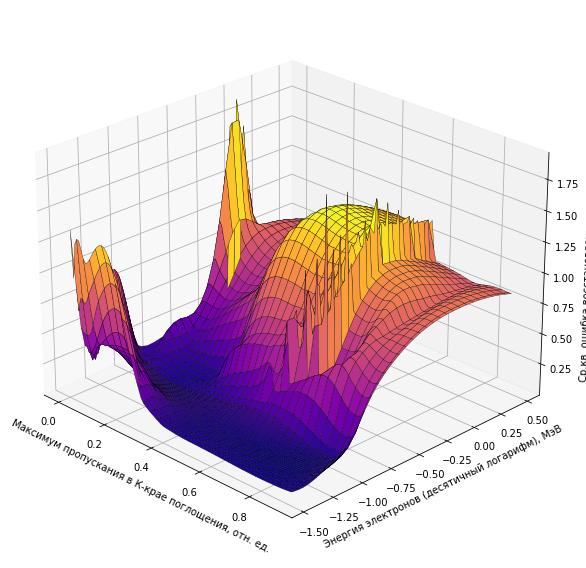

In [24]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(X, Ylog, D, cmap='plasma', linewidth=0.3, edgecolors='k', shade=True)

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов (десятичный логарифм), МэВ')
ax.set_zlabel('Ср.кв. ошибка восстановления, отн. ед.')
fig.tight_layout()

# угол зрения (линейный)
# ax.view_init(elev=20, azim=-135)

# угол зрения (логарифм)
ax.view_init(elev=25, azim=-45)

# fig.savefig('К_фильтры_3D.jpg', bbox_inches='tight')

Контурная карта

In [25]:
linspace4 = np.geomspace(1e-2, 0.3, 20)
linspace5 = np.linspace(0.31, 1.4, 10)

In [26]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

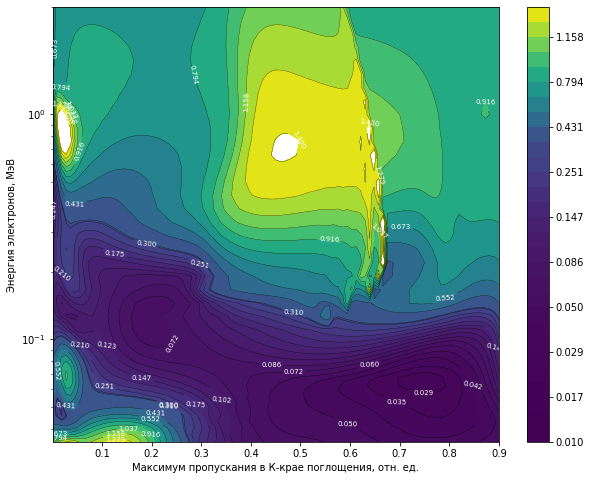

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('К_фильтры_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [28]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

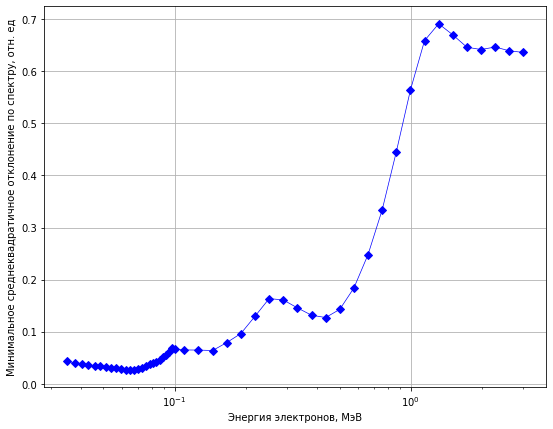

In [29]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('К_фильтры_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [30]:
np.save(f'K_{m}_MIN.npy', minimal_deviations)